In [20]:
from shapely import LineString,Point, BufferCapStyle, BufferJoinStyle,MultiPoint, Point
import matplotlib.pyplot as plt
import geopandas as gpd


def show(e):
    p = gpd.GeoSeries(e)
    p.plot()
    plt.show(block=False)

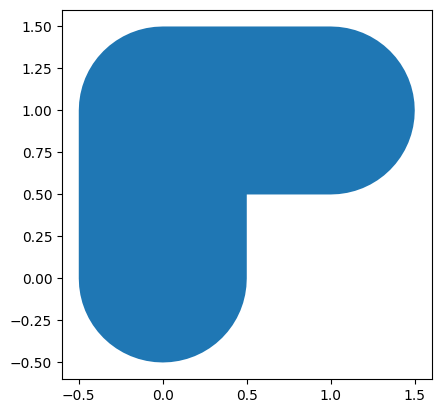

In [2]:
l = LineString([(0, 0), (0, 1), (1, 1)])

a = l.buffer(0.5, cap_style=BufferCapStyle.round, join_style=BufferJoinStyle.round)

show(a)

In [3]:
c=Point(0,0).buffer(5).boundary
l = LineString([Point(-10,-10),Point(0,0),Point(2,2), Point(10,10)])
print(MultiPoint(c.intersection(l)).geoms[0])

POINT (3.5355339059327378 3.5355339059327378)


In [4]:
from typing import Any, ClassVar, Dict, Tuple

# Example from https://github.com/shapely/shapely/issues/1233
class PropertyPoint(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = Point.__slots__  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    name: str  # For documentation generation and static type checking

    def __init__(self, coord: Tuple[float, float], name: str) -> None:
        self._id_to_attrs[id(self)] = dict(name=name)

    def __new__(cls, coord: Tuple[float, float], *args, **kwargs) -> "PropertyPoint":
        point = super().__new__(cls, coord)
        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[id(self)]

    def __getattr__(self, name: str) -> Any:
        try:
            return PropertyPoint._id_to_attrs[id(self)][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.name}, {self.wkt}"


In [5]:
class OrientedPoint1(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = (
        Point.__slots__
    )  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    theta: float  # For documentation generation and static type checking

    def __init__(
        self, coord: Tuple[float, float], theta: float = 0.0
    ) -> (
        None
    ):  # if theta is not optional or if the structure of the arguments change (eg: self, x, y, theta) then MultiPoint becomes impossible with OrientedPoint
        self._id_to_attrs[id(self)] = dict(theta=theta)

    def __new__(cls, coord: Tuple[float, float], *args, **kwargs) -> "OrientedPoint1":
        point = super().__new__(cls, coord)
        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[id(self)]

    def __getattr__(self, name: str) -> Any:
        try:
            return OrientedPoint1._id_to_attrs[id(self)][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.wkt}, theta: {self.theta}"


In [6]:

class OrientedPoint2(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = (
        Point.__slots__
    )  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    theta: float  # For documentation generation and static type checking

    def __init__(
        self, coord: Tuple[float, float], theta: float = 0.0
    ) -> (
        None
    ):  # if theta is not optional or if the structure of the arguments change (eg: self, x, y, theta) then MultiPoint becomes impossible with OrientedPoint
        self._id_to_attrs[str(id(self))] = dict(theta=theta)

    def __new__(cls, coord: Tuple[float, float], *args, **kwargs) -> "OrientedPoint2":
        point = super().__new__(cls, coord)
        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[str(id(self))]

    def __getattr__(self, name: str) -> Any:
        try:
            return OrientedPoint2._id_to_attrs[str(id(self))][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.wkt}, theta: {self.theta}"


In [7]:

class OrientedPoint3(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = (
        Point.__slots__
    )  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    theta: float  # For documentation generation and static type checking

    def __init__(
        self,x:float|Tuple[float, float],y:float|None=None, theta: float = 0.0
    ) -> (
        None
    ):  # if theta is not optional or if the structure of the arguments change (eg: self, x, y, theta) then MultiPoint becomes impossible with OrientedPoint
        self._id_to_attrs[id(self)] = dict(theta=(theta if not isinstance(x,Tuple) else y))

    def __new__(cls, x:float|Tuple[float, float],y:float|None=None, *args, **kwargs) -> "OrientedPoint3":
        if isinstance(x,Tuple):
            point = super().__new__(cls, x)
        else:
            point = super().__new__(cls, x,y)

        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[id(self)]

    def __getattr__(self, name: str) -> Any:
        try:
            return OrientedPoint3._id_to_attrs[id(self)][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.wkt}, theta: {self.theta}"

    @classmethod
    def from_Point(cls, point: Point, theta: float = 0.0):
        return cls((point.x, point.y), theta)


In [8]:

class OrientedPoint4(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = (
        Point.__slots__
    )  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    theta: float  # For documentation generation and static type checking

    def __init__(
        self,x_or_coords:float|Tuple[float, float],y:float|None=None, theta: float = 0.0
    ) -> (
        None
    ):  # if theta is not optional or if the structure of the arguments change (eg: self, x, y, theta) then MultiPoint becomes impossible with OrientedPoint
        self._id_to_attrs[str(id(self))] = dict(theta=(theta if not isinstance(x_or_coords,Tuple) else (0.0 if y is None else y)))

    def __new__(cls, x_or_coords:float|Tuple[float, float],y:float|None=None, *args, **kwargs) -> "OrientedPoint4":
        if isinstance(x_or_coords,Tuple):
            point = super().__new__(cls, x_or_coords)
        else:
            point = super().__new__(cls, x_or_coords,y)

        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[str(id(self))]

    def __getattr__(self, name: str) -> Any:
        try:
            return OrientedPoint4._id_to_attrs[str(id(self))][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.wkt}, theta: {self.theta}"

    @classmethod
    def from_Point(cls, point: Point, theta: float = 0.0):
        return cls((point.x, point.y), theta)


In [9]:
from shapely.ops import nearest_points
from shapely import Polygon

demo = PropertyPoint((1,2),"demo")
p1 = OrientedPoint3((1,2),10)

p2 = Point(5,6)
p3 = Point(5,7)
pFrom = OrientedPoint3.from_Point(p3)
print(demo)
print(demo.name)
print(p1)

print(p1.x, p1.y, p1.theta)

poly = Polygon([[-10,-10],[-10,10],[10,10],[10,-10]])
print(poly.contains(p2))
print(poly.contains(p1))
print(nearest_points(p1, MultiPoint([p2,p3])))


demo, POINT (1 2)
demo
POINT (1 2), theta: 10
1.0 2.0 10
True
True
(<POINT (1 2)>, <POINT (5 6)>)


In [10]:
# MultiPoint (needs theta optional in constructor, because it re-constructs its elements; for example, doesn't work with the example class):
p1copy = Point(p1)
coll = MultiPoint([p1,p2])
print(coll.geoms[0])
print(coll.geoms[1])

print(coll)


POINT (1 2)
POINT (5 6)
MULTIPOINT (1 2, 5 6)


In [11]:
for PointType in [OrientedPoint1,OrientedPoint2,OrientedPoint3, OrientedPoint4]:
    try:
        # Using tuples coords
        p1 = PointType((1,2),3)
        assert p1.x == 1 and p1.y==2 and p1.theta==3, "Tuple with explicit theta"
        p1coll = MultiPoint([p1,p1])
        p1 = PointType((1,2))
        assert p1.x == 1 and p1.y==2 and p1.theta==0, f"Tuple with default theta: theta={p1.theta}"
        p1coll = MultiPoint([p1,p1])
        print("Tuple ok")

        # Using x,y coords
        p2 = PointType(4,5,6)
        assert p2.x == 4 and p2.y==5 and p2.theta==6, "Separate with explicit theta"
        p2coll = MultiPoint([p2,p2])
        p2 = PointType(4,5)
        assert p2.x == 4 and p2.y==5 and p2.theta==0, "Separate with default theta"
        p2coll = MultiPoint([p2,p2])
        print("x,y ok")

        assert nearest_points(p1coll,p2coll)[0].distance(p2)==p2.distance(p1)
        print("Operations ok")

        print(f"{PointType.__name__} fully valid!")

    except Exception as e:
        print(f"{PointType.__name__} not fully valid: {e}")

Tuple ok
OrientedPoint1 not fully valid: 'int' object is not iterable
Tuple ok
OrientedPoint2 not fully valid: 'int' object is not iterable
OrientedPoint3 not fully valid: Tuple with default theta: theta=None
Tuple ok
x,y ok
Operations ok
OrientedPoint4 fully valid!


In [12]:
# The version with explicit conversion to string for dict keys (which solves an ide warning) is a bit slower •`_´•
# The version that supports both (x,y),theta and x,y,theta parameters is also a bit slower

import timeit

setup_base = "from __main__ import Point as PointType"
setup = "from __main__ import OrientedPoint1 as PointType"
setup2 = "from __main__ import OrientedPoint2 as PointType"
setup3 = "from __main__ import OrientedPoint3 as PointType"
setup4 = "from __main__ import OrientedPoint4 as PointType"
statement_base = "p=PointType((13.24,2.5421))"
statement_tuple = "p=PointType((13.24,2.5421), 10.0)"
statement_xy = "p=PointType((13.24,2.5421), 10.0)"
print(timeit.timeit(stmt=statement_base, setup=setup_base, number=10000000))
print(timeit.timeit(stmt=statement_tuple, setup=setup, number=10000000))
print(timeit.timeit(stmt=statement_tuple, setup=setup2, number=10000000))
print(timeit.timeit(stmt=statement_tuple, setup=setup3, number=10000000))
print(timeit.timeit(stmt=statement_xy, setup=setup3, number=10000000))
print(timeit.timeit(stmt=statement_tuple, setup=setup4, number=10000000))

KeyboardInterrupt: 

4.695875315350411
(<POINT (22.5 22.5)>, <POINT (114.286 270.564)>)


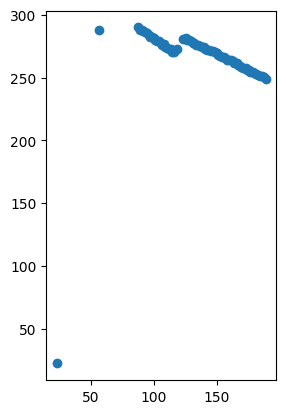

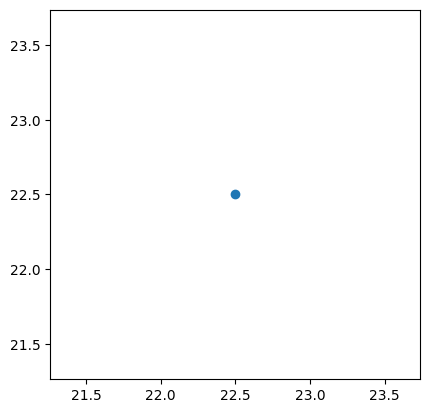

In [21]:
from shapely import Point, MultiPoint, distance
from shapely.ops import nearest_points
import numpy as np

string_coords = "56.63570259284123 287.61139846734574, 87.46532586679751 289.92205061245596, 88.67644827824887 288.1823498253245, 90.24462666634406 287.8900378957956, 91.6052422924872 286.8155541348611, 93.18836928355378 286.6035992004456, 94.5376481246475 285.5130679460328, 95.71078476644747 283.83912390013984, 97.00461705577558 282.6411642562456, 98.51570580622813 282.2036306523335, 99.90567223854826 281.3752441047217, 101.20099643003763 280.2526006870138, 102.43030694821871 278.9314904803468, 104.03707476134552 278.84489548138606, 105.3677544726399 277.8922184966924, 106.41127602114605 276.0770317221201, 108.16787167570301 276.4390000818214, 109.18363706718631 274.6140496823348, 110.54867682984914 273.82276112742034, 111.80277899612722 272.7429022977184, 113.32056861818624 272.4088455217617, 114.2860732991372 270.56363447374827, 115.72287954117465 270.0272605796211, 118.3017391704616 272.4706448916743, 123.1319545729018 280.57403921905325, 125.14281686783097 281.2875745606799, 126.37976639216268 280.03887854969065, 128.0649703059276 279.8932474566902, 129.5556408837832 279.2768224489017, 130.7305764753188 277.9151501567394, 132.17406719214176 277.1897764251918, 133.36842240880182 275.9082798352263, 135.16079778470998 275.99221143120405, 136.5914414126484 275.24181732820716, 138.09667225579454 274.66694069040057, 139.59907090346584 274.0831027584028, 140.76061230333875 272.765180997731, 142.29623950220963 272.25560254202355, 144.09255196351526 272.27610270067873, 145.36540905694278 271.20634867457585, 146.98467401915602 270.8473698424943, 148.46789320343328 270.21050944510705, 149.86001110907176 269.38515091766317, 151.05756964810894 268.19948008929987, 152.4331876570321 267.36162115133675, 153.80710755562612 266.5140159398685, 155.50714734911122 266.2752624537084, 156.77318872511552 265.237445408324, 158.13317472610086 264.36551044681755, 159.68156527235323 263.835827299013, 161.57780094080468 263.90283487637186, 163.02927278834053 263.17655324788427, 163.96413860819874 261.5831396422184, 165.91365846544292 261.70227666353077, 167.0422585459219 260.4371599729778, 168.3670447278534 259.509891076151, 169.6859552425289 258.575287506627, 171.10929311799543 257.8001513058083, 172.9022373817681 257.6084076817101, 173.8823189976013 256.1449231129815, 175.5672511873994 255.76254867409295, 176.5297725902954 254.28807640029382, 178.65275967938365 254.55257034041463, 179.9991737733111 253.6408445467931, 181.3935608756041 252.80607147631403, 182.8407938638584 252.04483183706765, 184.17255828153267 251.10880100885097, 186.07751097867597 250.98062916146992, 187.69297769051443 250.43317029721936, 188.89697767749362 249.3076915629628"
coords = [[float(val) for val in point.split(" ")] for point in string_coords.split(", ")]

m1 = Point([22.5,22.5])
m2 = MultiPoint(coords)

print(np.std([distance(m1,geom) for geom in m2.geoms]))

print(nearest_points(m1,m2))

show([m1,m2])
show([m1])